In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.interpolate import interp1d

In [66]:
models = ['ref','idm1','idm2']

cosmo={}
for M in models:
    cosmo[M] = Class()
    cosmo[M].set({'gauge':'newtonian',
                  'output':'tCl',
                  'omega_cdm':0.12038,
                  #'z_reio':11.357,
                  #'reionization_z_start_max':750,
                  #'z_reiomod_start':300,
                  #'recfast_Nz0':80000,
                  #'recfast_z_initial':1e7,
                  'recombination':'recfast',
                  #'recfast_H_frac':3e-4,
                  'reio_parametrization':'reio_none'
                 })
    if M == 'idm1':
        cosmo[M].set({'a_bidm':5e-4,
                      'f_bidm':0.99,
                      'A_bidm':1.7e-41,
                      'm_bidm':1,
                      'n_bidm':-4,
                      'bidm_type':'powerlaw'})
    if M == 'idm2':
        cosmo[M].set({'a_bidm':5e-2,
                      'f_bidm':0.99,
                      'A_bidm':1.9e-41,
                      'm_bidm':100.,
                      'n_bidm':-4,
                      'bidm_type':'powerlaw'})
    print([M])
    cosmo[M].compute()


['ref']
['idm1']
['idm2']


In [67]:
recfast_triggers={'recfast_z_He_1':8050,'recfast_z_He_2':5100,'recfast_z_He_3':3550,'approx 5':2867,'full':1604, 'no approx':1165}

(10, 10000.0)

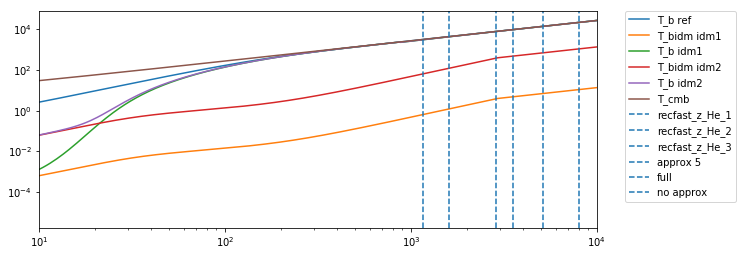

In [68]:
plt.figure(figsize = (10,4))
for M in models:
    Th = cosmo[M].get_thermodynamics()
    #print(Th.keys())
    if M != 'ref':
        plt.loglog(Th['z'],Th['Tbidm [K]'],label='T_bidm '+M)
    plt.loglog(Th['z'],Th['Tb [K]'],label = 'T_b '+M)
plt.loglog(Th['z'],2.73*(Th['z']+1), label = 'T_cmb')

for rct in recfast_triggers:
    plt.axvline(x=recfast_triggers[rct],linestyle='--',label=rct)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(10,1e4)
#plt.ylim(1e2,1e4)

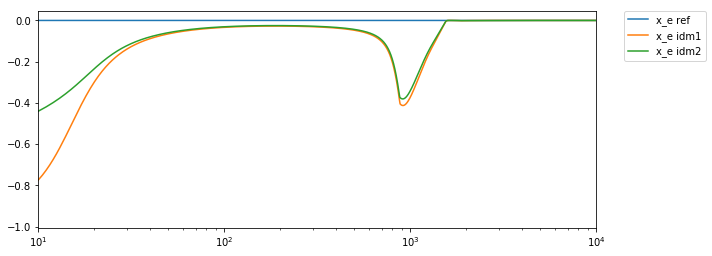

In [69]:
plt.figure(figsize = (10,4))
Th = cosmo['ref'].get_thermodynamics()
x_eref = interp1d(Th['z'],Th['x_e'])

for M in models:
    Th = cosmo[M].get_thermodynamics()
    #print(Th.keys())
    plt.semilogx(Th['z'],(Th['x_e']-x_eref(Th['z']))/x_eref(Th['z']),label='x_e '+M)
plt.xlim(10,1e4)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

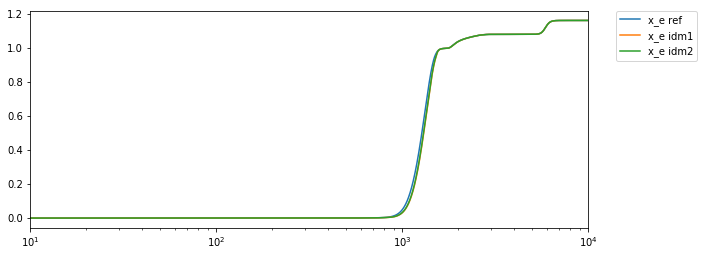

In [70]:
plt.figure(figsize = (10,4))
for M in models:
    Th = cosmo[M].get_thermodynamics()
    #print(Th.keys())
    plt.semilogx(Th['z'],Th['x_e'],label='x_e '+M)
plt.xlim(10,1e4)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

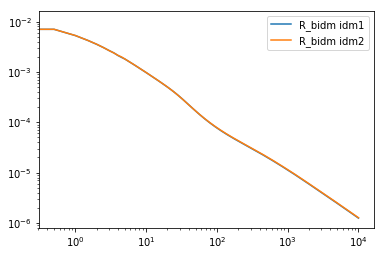

In [71]:
for M in models:
    Th = cosmo[M].get_thermodynamics()
    #print(Th.keys())
    if M != 'ref':
        H = np.array([cosmo[M].Hubble(zz) for zz in Th['z']])
        plt.loglog(Th['z'],Th['Rbidm'],label='R_bidm '+M)

#plt.loglog(Th['z'],(Th['z']+1)**0.5,label='a^-0.5')
#plt.loglog(Th['z'],(Th['z']+1)**(-1),label='a')
#plt.loglog(Th['z'],(Th['z']+1)**(2),label='a^-2')
plt.legend()
#plt.loglog(Th['z'],(Th['z']+1)**(-1)+(Th['z']+1)**0.5)

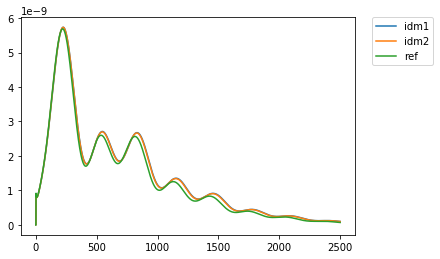

In [72]:
clref = cosmo['ref'].raw_cl(2500)
cl = cosmo['idm1'].raw_cl(2500)
cl2 = cosmo['idm2'].raw_cl(2500)
l = clref['ell']
TTref = clref['tt']
TT = cl['tt']
TT2 = cl2['tt']
plt.plot(l,(l*(l+1))*TT, label='idm1')
plt.plot(l,(l*(l+1))*TT2, label='idm2')
plt.plot(l,(l*(l+1))*TTref, label='ref')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/home/markus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


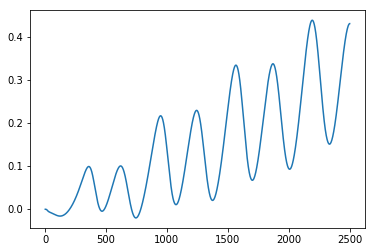

In [73]:
plt.plot(l,(TT-TTref)/TTref)

In [49]:
def Vrms(z):
    if z > 1e3:
        return 1e-8
    else:
        return ((1+z)/1e3)**2 * 1e-8

In [50]:
V=np.zeros(Th['z'].shape)
for i in range(0,Th['z'].shape[0]):
    V[i] = Vrms(Th['z'][i])
    

(20, 10000.0)

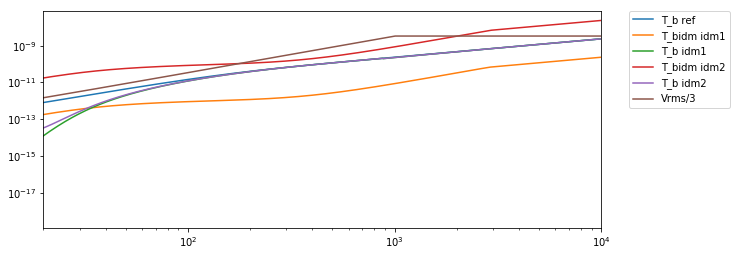

In [52]:
plt.figure(figsize = (10,4))
for M in models:
    Th = cosmo[M].get_thermodynamics()
    #print(Th.keys())
    if M != 'ref':
        plt.loglog(Th['z'],Th['Tbidm [K]']*8.61733e-5/1e6,label='T_bidm '+M)
    plt.loglog(Th['z'],Th['Tb [K]']*8.61733e-5/1e9,label = 'T_b '+M)
plt.loglog(Th['z'],V/3, label = 'Vrms/3')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(20,1e4)

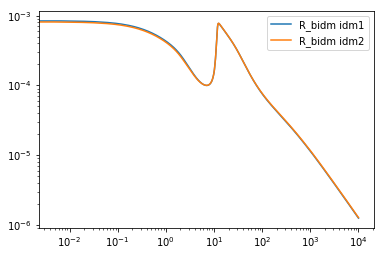

In [17]:
for M in models:
    Th = cosmo[M].get_thermodynamics()
    #print(Th.keys())
    if M != 'ref':
        H = np.array([cosmo[M].Hubble(zz) for zz in Th['z']])
        plt.loglog(Th['z'],Th['Rbidm'],label='R_bidm '+M)
plt.legend()

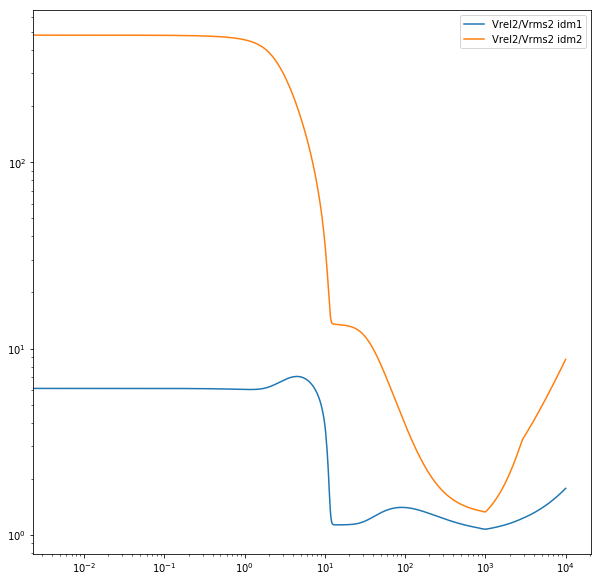

In [18]:
plt.figure(figsize = (10,10))
for M in models:
    Th = cosmo[M].get_thermodynamics()
    Vtherm=np.zeros(Th['z'].shape)
    Vrat=np.zeros(Th['z'].shape)
    #print(Th.keys())
    if M != 'ref':
        Vtherm +=Th['Tbidm [K]']*8.61733e-5/1e6
        Vtherm +=Th['Tb [K]']*8.61733e-5/1e9
        Vtherm +=V/3
        plt.loglog(Th['z'],Vtherm/(V/3),label='Vrel2/Vrms2 '+M)
plt.legend()

In [25]:
Vtherm.shape

(80638, 1)

In [22]:
Th['Tbidm [K]'].shape

(80638,)

In [31]:
Th['Tbidm [K]']

array([2.00593126e-04, 2.02519091e-04, 2.07857245e-04, ...,
       2.72539807e+01, 2.72543214e+01, 2.72546620e+01])

In [32]:
Vtherm

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [33]:
A = np.zeros(Th['Tbidm [K]'].shape)

In [34]:
A

array([0., 0., 0., ..., 0., 0., 0.])